# Import Librarys

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier


import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


from imblearn.over_sampling import SMOTE

# 2. Loading df

In [32]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [33]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [34]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Over18'] = df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

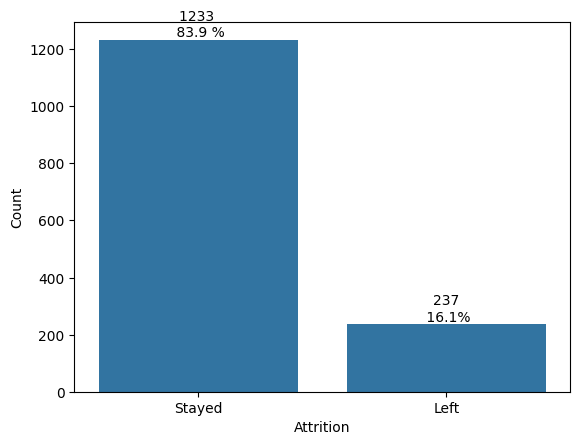

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Attrition', data=df)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks([0,1], ['Stayed', 'Left'])
plt.annotate(f'{df["Attrition"].value_counts()[0]} \n {round(df["Attrition"].value_counts()[0]/len(df)*100,1)} %', (0, df["Attrition"].value_counts()[0]), ha='center', va='bottom')
plt.annotate(f'{df["Attrition"].value_counts()[1]}\n {round(df["Attrition"].value_counts()[1]/len(df)*100,1)}%', (1, df["Attrition"].value_counts()[1]), ha='center', va='bottom')

plt.show()
plt.show()

In [36]:
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis="columns", inplace=True)

In [37]:
left_df = df[df['Attrition'] == 1]
stayed_df = df[df['Attrition'] == 0]
print(f'Total Employees: {len(df)}\n')
print(f'Number of employees who left: {df["Attrition"].value_counts()[1]}')
print(f'% of employees who left: {round(df["Attrition"].value_counts()[1]/len(df)*100,2)}%\n')
print(f'Number of employees who stayed: {df["Attrition"].value_counts()[0]}')
print(f'% of employees who stayed: {round(df["Attrition"].value_counts()[0]/len(df)*100,2)}%')

Total Employees: 1470

Number of employees who left: 237
% of employees who left: 16.12%

Number of employees who stayed: 1233
% of employees who stayed: 83.88%


In [38]:
left_df = df[df['Attrition'] == 1]
stayed_df = df[df['Attrition'] == 0]

In [39]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [40]:
left_df.describe()

#  Let's compare the mean and std of the employees who stayed and left
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


<Axes: xlabel='DistanceFromHome', ylabel='Count'>

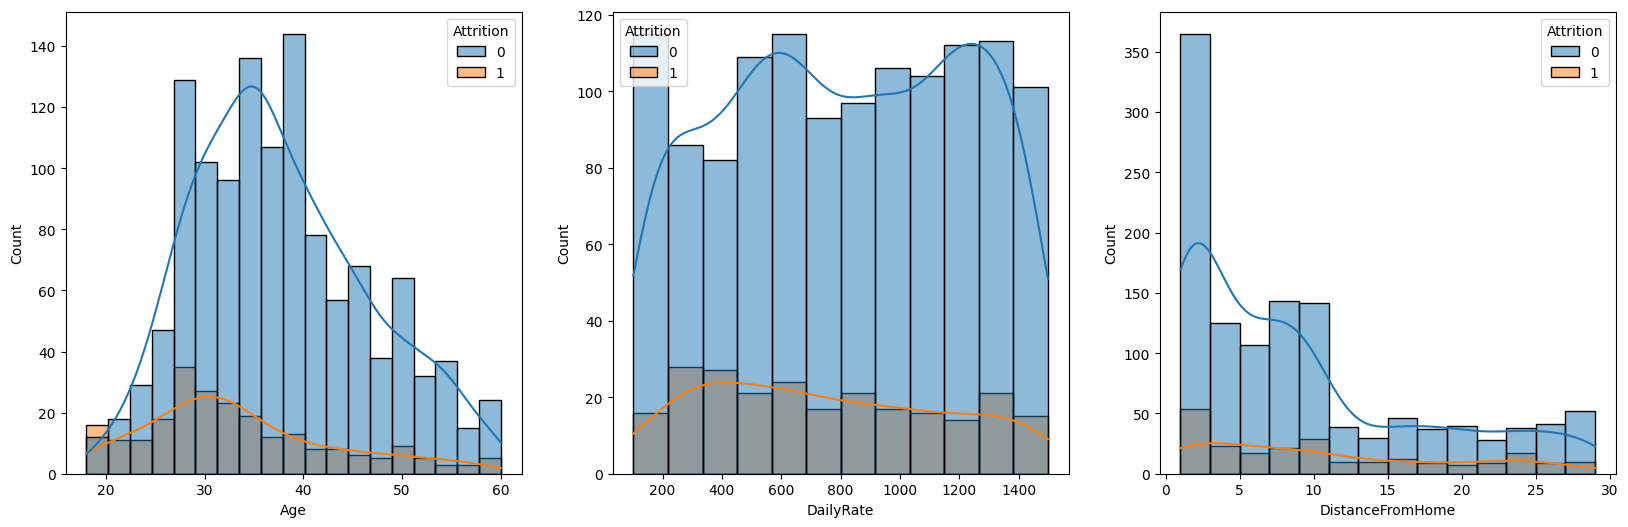

In [41]:
#plot histogram of numeric df with Attrition 1 or 0
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.histplot(df, x='Age', hue='Attrition', kde=True, ax=ax[0])
sns.histplot(df, x='DailyRate', hue='Attrition', kde=True, ax=ax[1])
sns.histplot(df, x='DistanceFromHome', hue='Attrition', kde=True, ax=ax[2])


<Axes: xlabel='StockOptionLevel', ylabel='Count'>

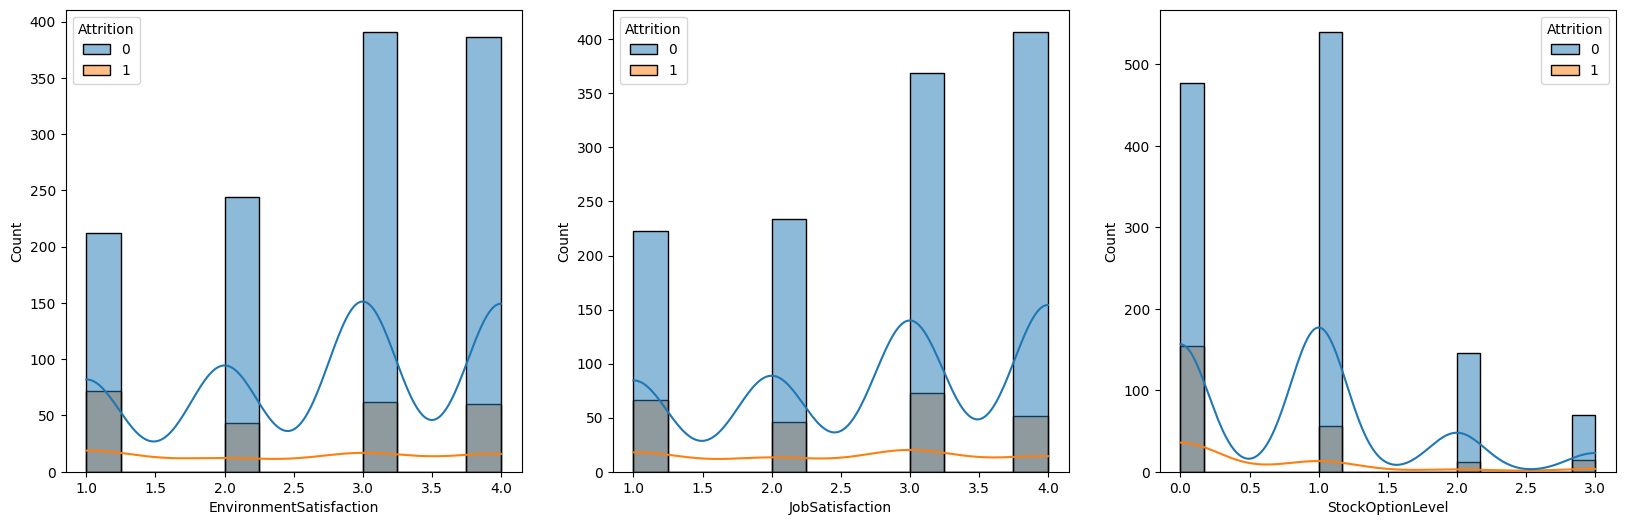

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.histplot(df, x='EnvironmentSatisfaction', hue='Attrition', kde=True, ax=ax[0])
sns.histplot(df, x='JobSatisfaction', hue='Attrition', kde=True, ax=ax[1])
sns.histplot(df, x='StockOptionLevel', hue='Attrition', kde=True, ax=ax[2])

In [43]:
# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income

<Axes: >

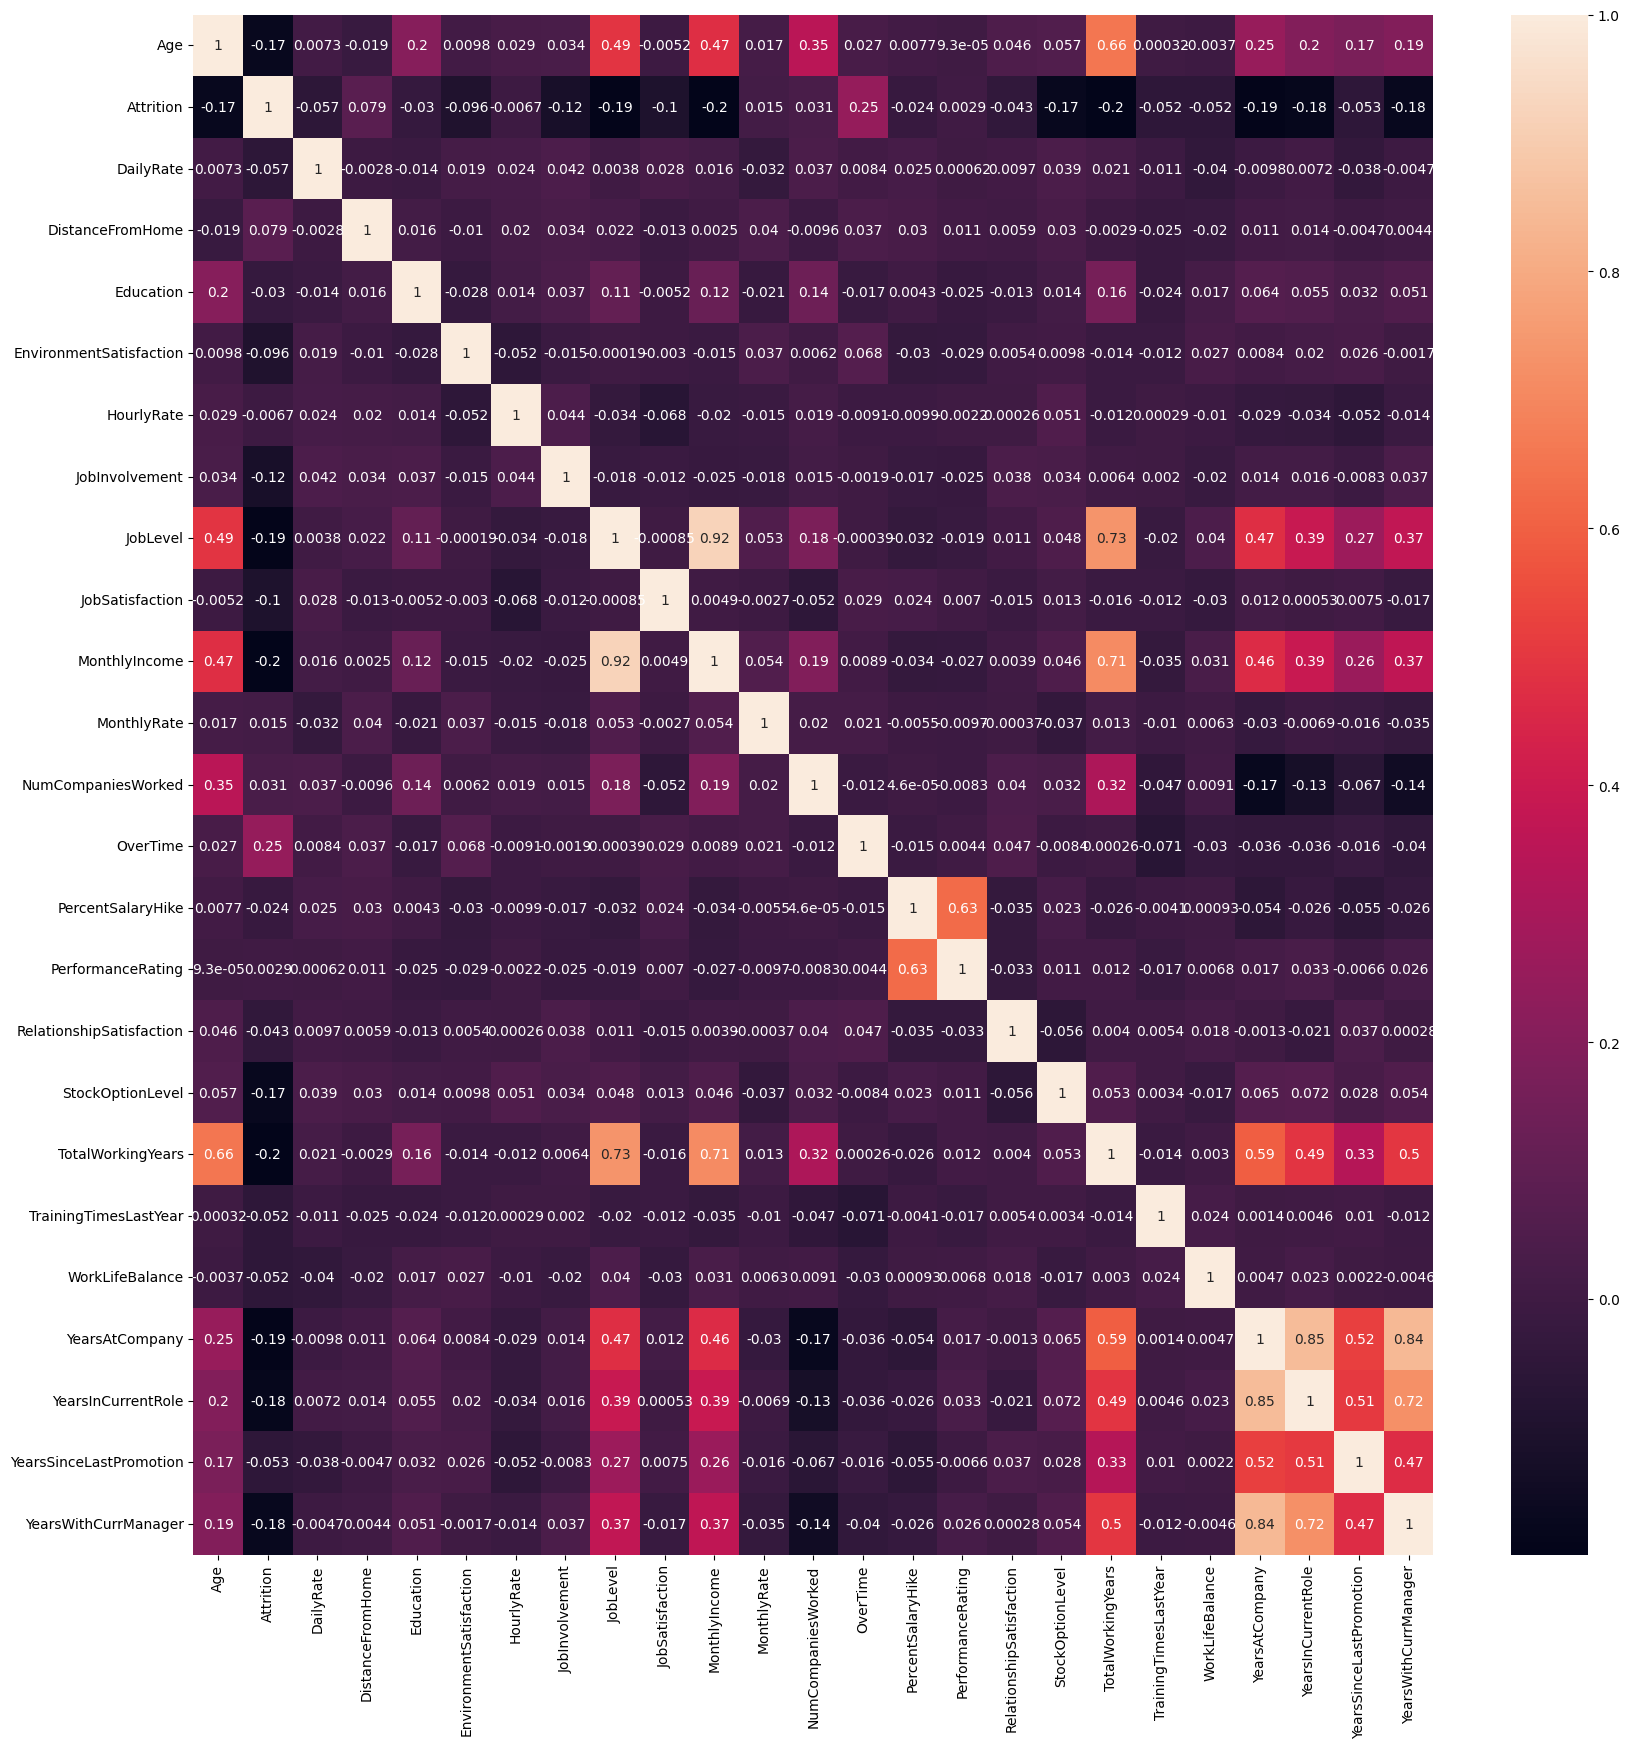

In [44]:
correlations = df.corr(numeric_only=True, method='spearman') #We're using Spearman's Correlation Coefficient as we are dealing with non-parametric df (not normally distributed)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True)
# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income

<Axes: xlabel='Age', ylabel='count'>

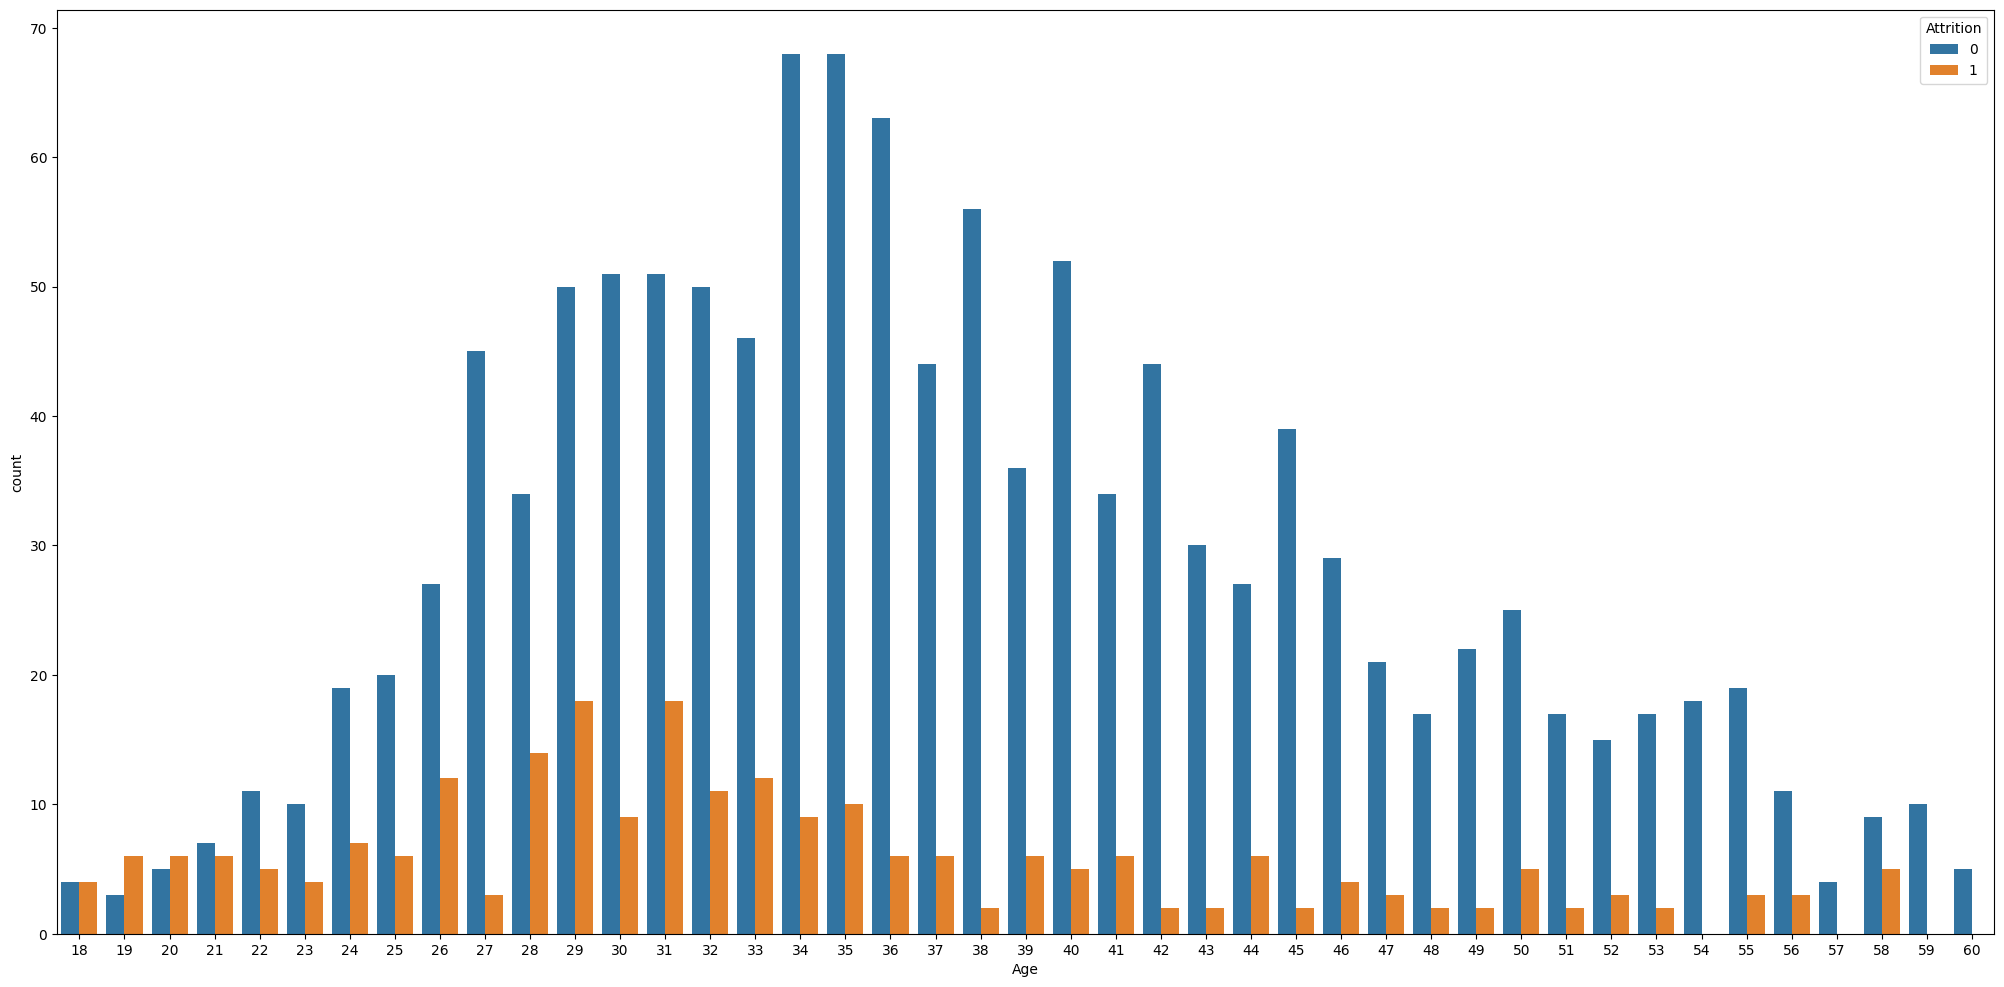

In [45]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = df)

<Axes: xlabel='JobLevel', ylabel='count'>

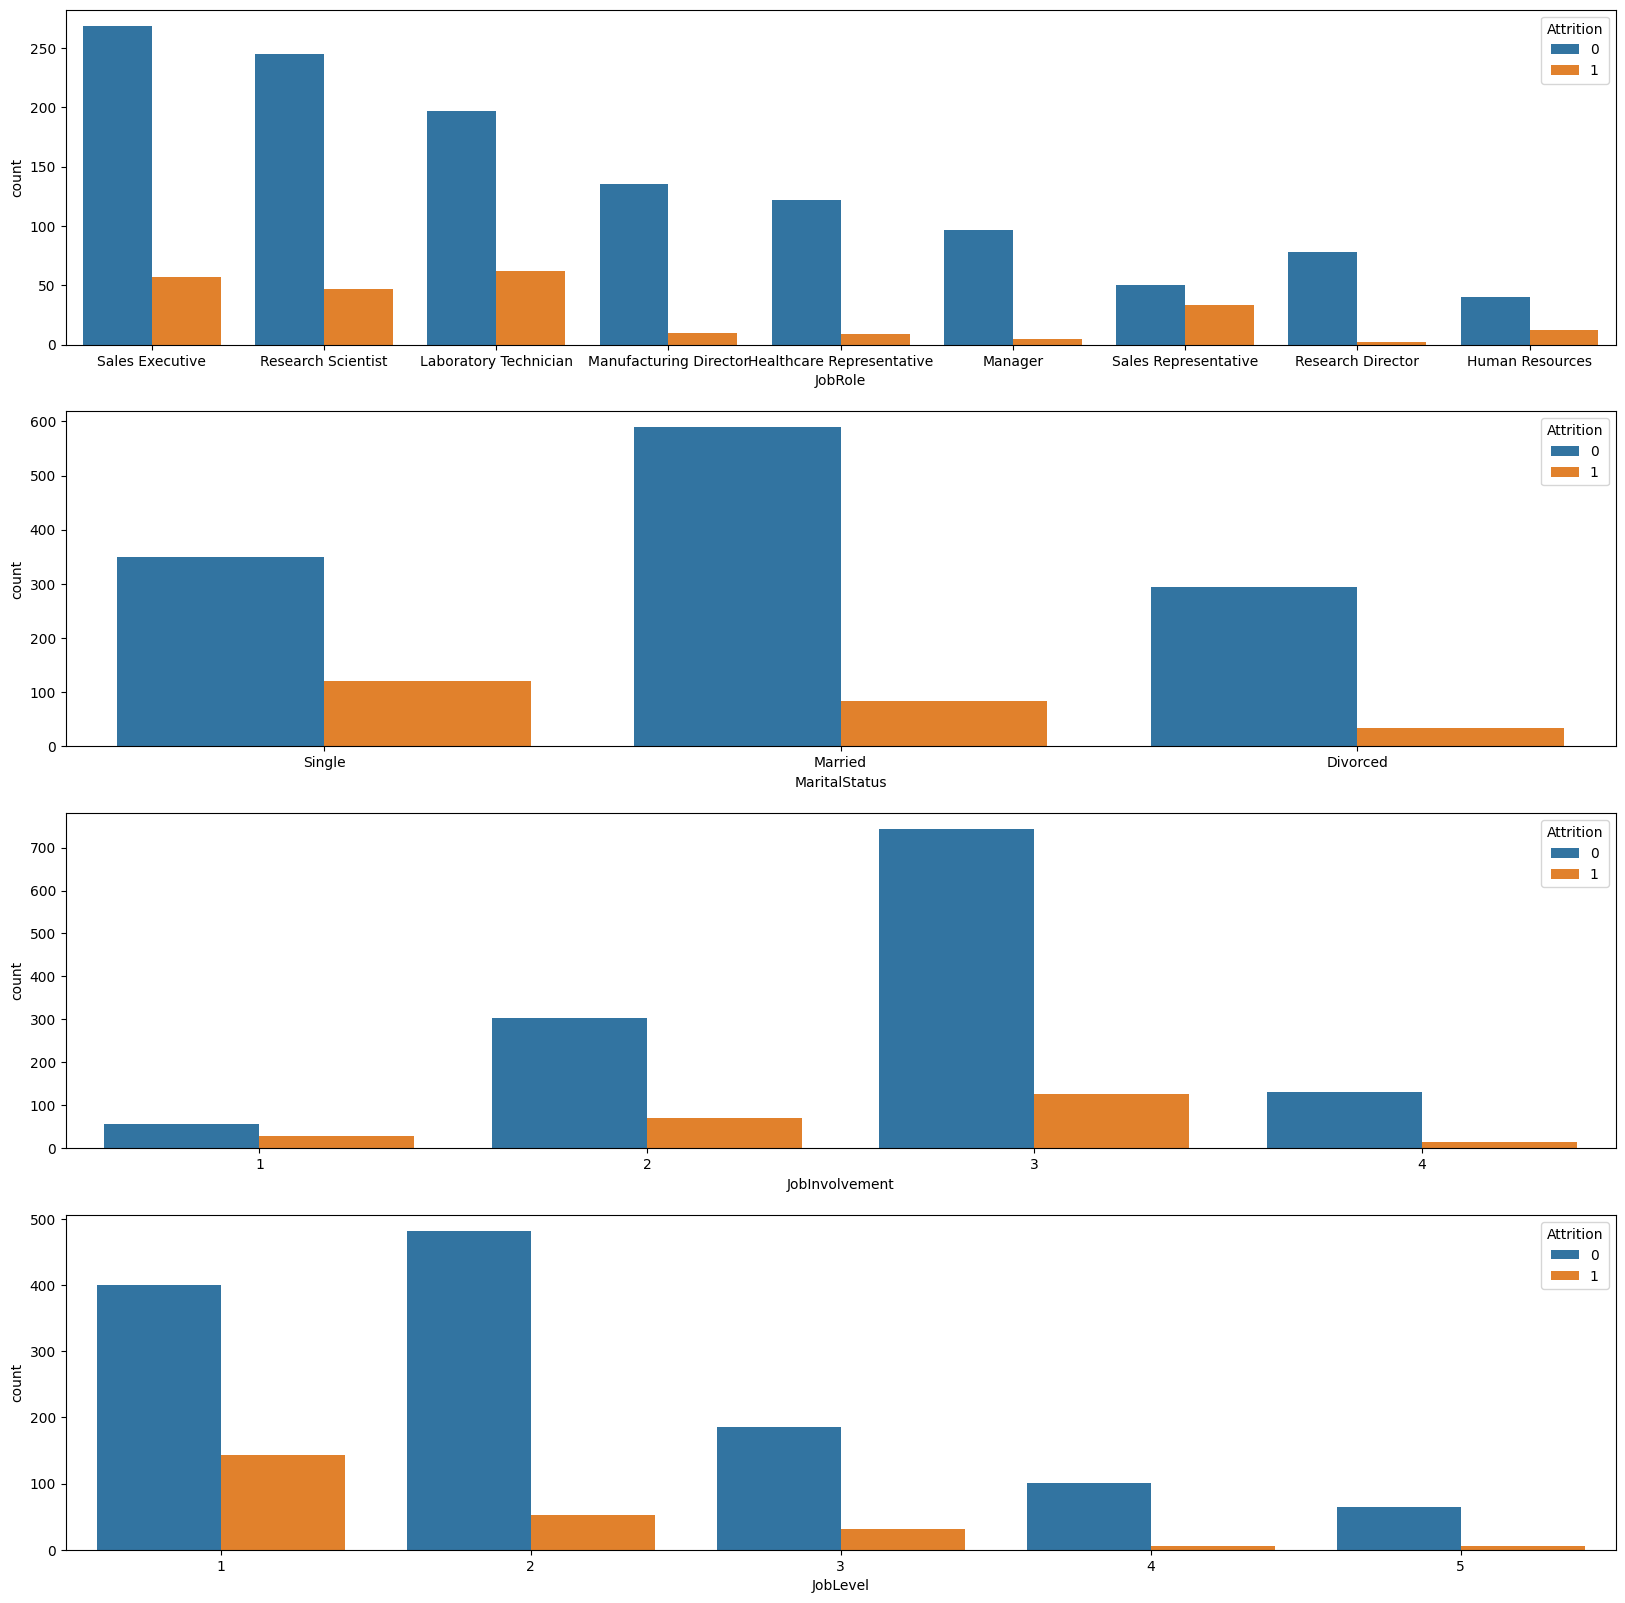

In [46]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df)

# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job
# Less involved employees tend to leave the company
# Less experienced (low job level) tend to leave the company

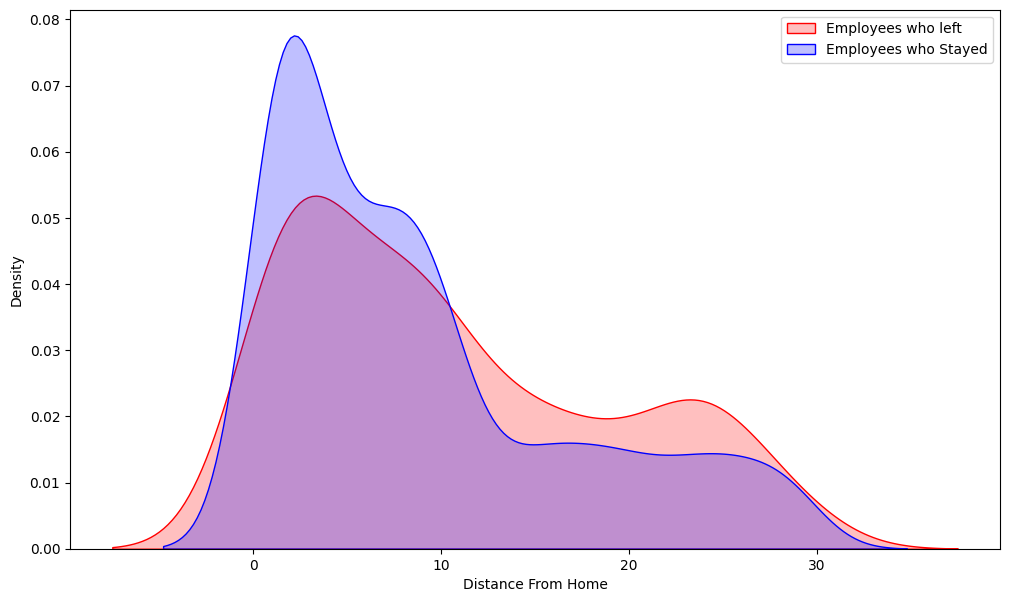

In [47]:
# There is significant difference in the distance from home between employees who left and stayed (p<.05)
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['DistanceFromHome'], label='Employees who left', fill=True, color='r')
sns.kdeplot(stayed_df['DistanceFromHome'], label='Employees who Stayed', fill=True, color='b')
plt.xlabel('Distance From Home')
plt.legend()

In [48]:
#Mann-Whitney's test to check if there is a significant difference between the two groups
from scipy.stats import mannwhitneyu
stats, p = mannwhitneyu(left_df["DistanceFromHome"], stayed_df["DistanceFromHome"])
print(f'p-value: {p}')
# p-value is 0.0023870470273627984 which is less than 0.05, so we reject the null hypothesis
# There is significant difference in the distance from home between employees who left and stayed

p-value: 0.0023870470273627984


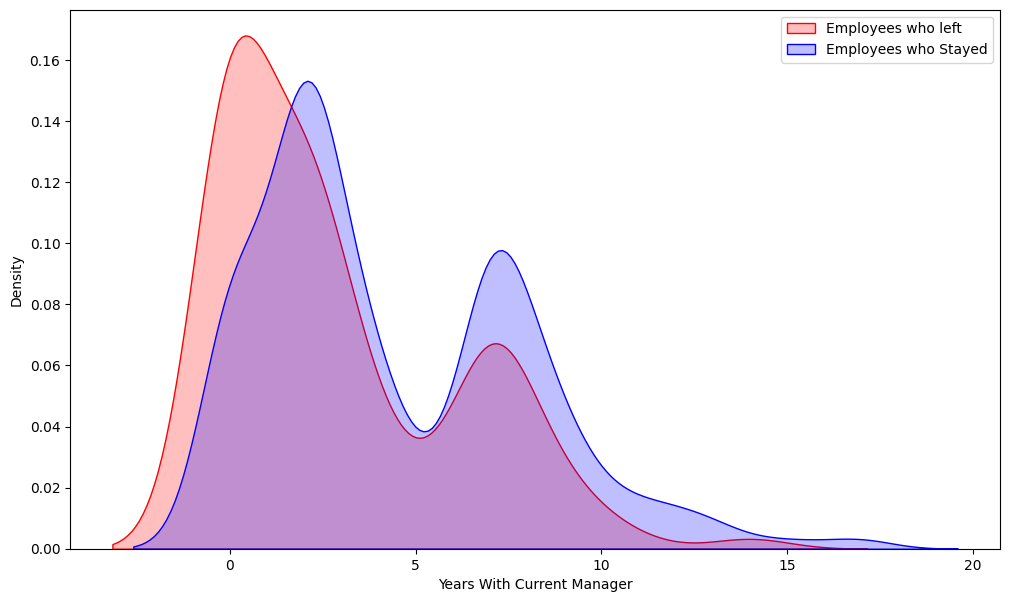

In [49]:
# There is significant difference in the Years With Current Manager between employees who left and stayed (p<.05)
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['YearsWithCurrManager'], label='Employees who left', fill=True, color='r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label='Employees who Stayed', fill=True, color='b')
plt.xlabel('Years With Current Manager')
plt.legend()

In [50]:
#Mann-Whitney's test to check if there is a significant difference between the two groups
from scipy.stats import mannwhitneyu
stats, p = mannwhitneyu(left_df["YearsWithCurrManager"], stayed_df["YearsWithCurrManager"])
print(f'p-value: {p}')
# p-value is 1.8067542583144407e-11 which is less than 0.05, so we reject the null hypothesis
# There is significant difference in the years with current manager between employees who left and stayed

p-value: 1.8067542583144407e-11


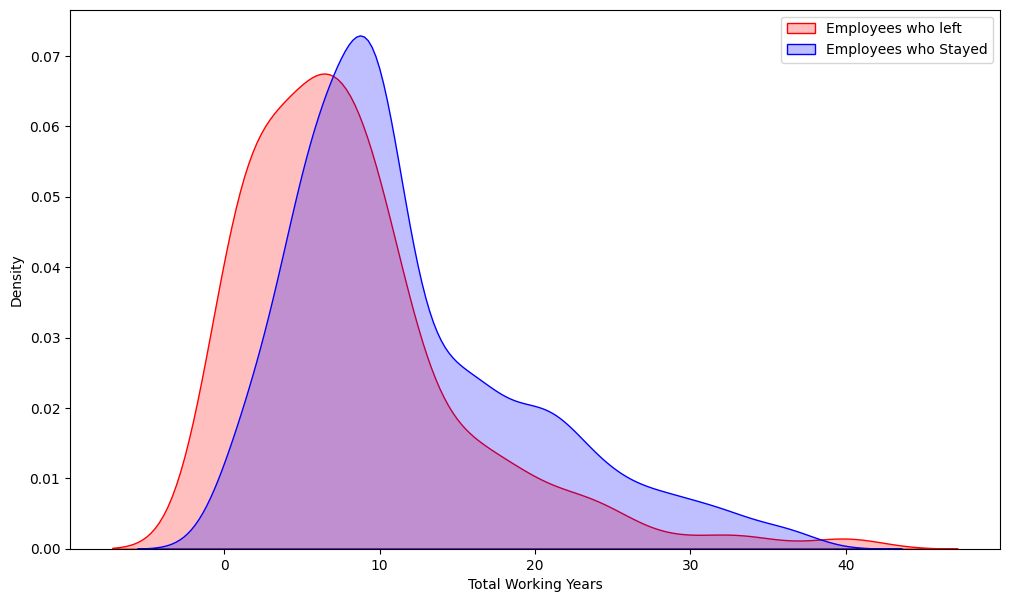

In [51]:
# There is significant difference in the Total Working Years between employees who left and stayed (p<.05)
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['TotalWorkingYears'], label='Employees who left', fill=True, color='r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label='Employees who Stayed', fill=True, color='b')
plt.xlabel('Total Working Years')
plt.legend()

In [52]:
#Mann-Whitney's test to check if there is a significant difference between the two groups
from scipy.stats import mannwhitneyu
stats, p = mannwhitneyu(left_df["TotalWorkingYears"], stayed_df["TotalWorkingYears"])
print(f'p-value: {p}')
# p-value is 2.399569364798952e-14 which is less than 0.05, so we reject the null hypothesis
# There is significant difference in the total working years between employees who left and stayed

p-value: 2.399569364798952e-14


<Axes: xlabel='Gender', ylabel='MonthlyIncome'>

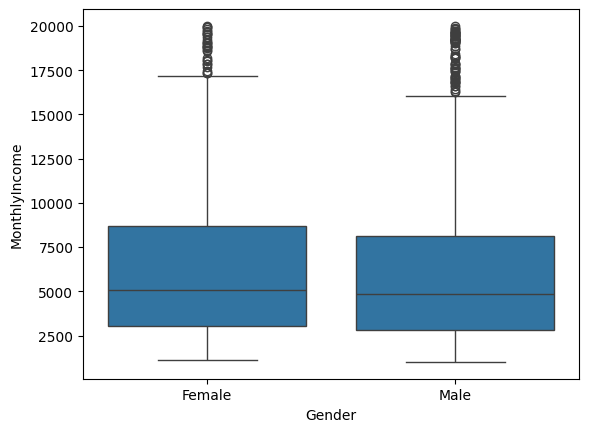

In [53]:
# There are no significant differences in Monthly Income between Female and Male employees (p=0.09)
# Let's see the Gender vs. Monthly Income
sns.boxplot(x='Gender', y='MonthlyIncome', data=df)

In [54]:
#Mann-Whitney's test to check if there is a significant difference between Male and Female MonthlyIncome
from scipy.stats import mannwhitneyu
male_income = df[df['Gender'] == 'Male']['MonthlyIncome']
female_income = df[df['Gender'] == 'Female']['MonthlyIncome']

stats, p = mannwhitneyu(male_income, female_income)
print(f'p-value: {p}')
# p-value is 0.08841668326602112 which is greater than 0.05, so we fail to reject the null hypothesis and assume no differences in MonthlyIncome between Male and Female employees

p-value: 0.08841668326602112


<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

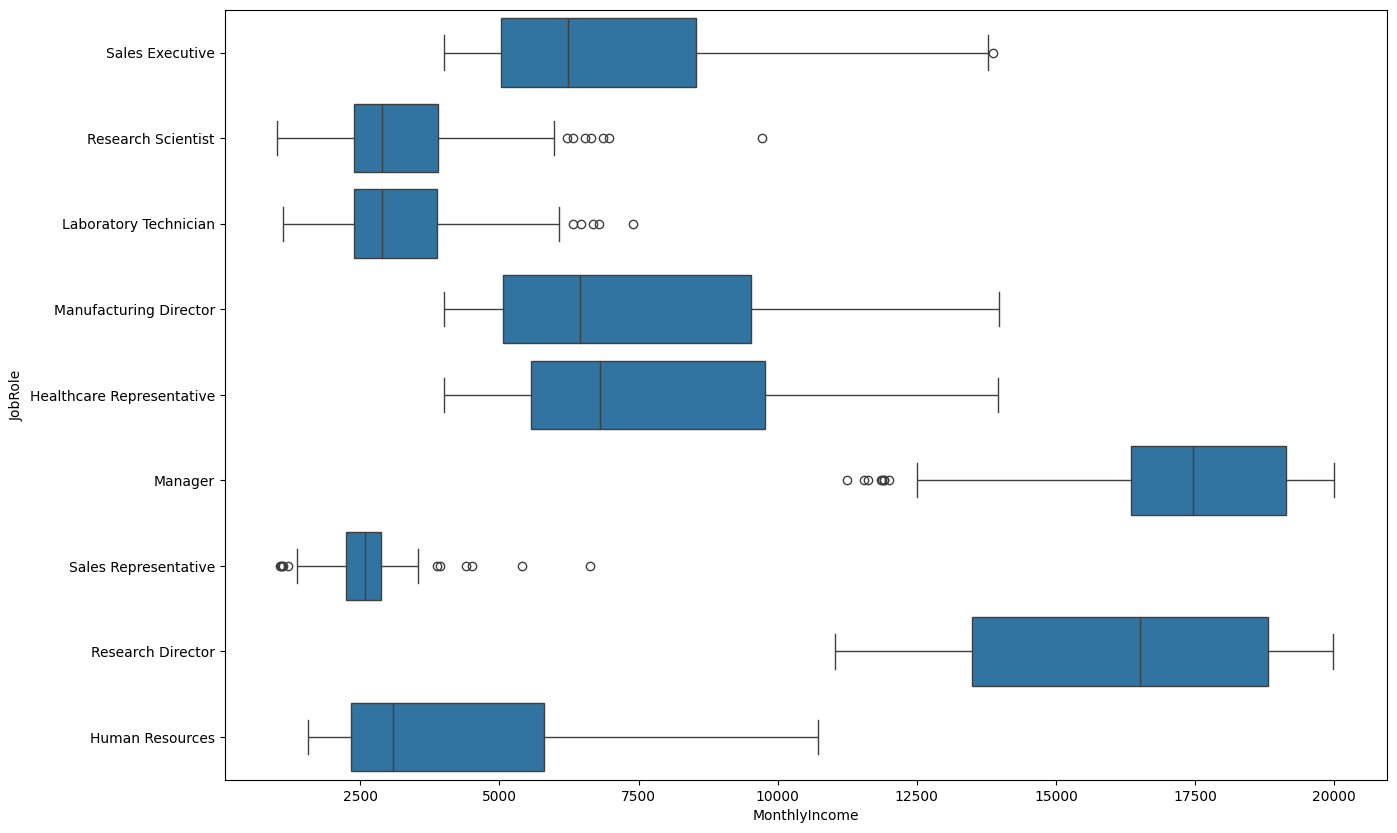

In [55]:
# Research Directors and Managers have the highest Monthly Income
# Sales Representatives have the lowest Monthly Income, followed by Research Scientists and Lab Technicians
# Let's see the Job Role vs. Monthly Income
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=df)

# Data Preparation

In [56]:
ohe = OneHotEncoder()
#Separating all categorical data from the dataset
X_cat = df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat = ohe.fit_transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)
#assigning column names
X_cat.columns = ohe.get_feature_names_out(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])

In [57]:
X_cat

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [58]:
X_num = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 
              'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 
              'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 
              'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

X_all = pd.concat([X_num, X_cat], axis=1)

In [59]:
X_cat.shape

(1470, 26)

In [60]:
X_num.shape

(1470, 24)

In [61]:
X_all

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,591,2,1,1,40,3,1,2,3468,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,613,6,1,4,42,2,3,1,9991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,155,4,3,2,87,4,2,2,6142,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [62]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_all)

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['Attrition'], test_size=0.25)

In [64]:
smote = SMOTE(random_state=42, sampling_strategy='minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train_t=torch.tensor(X_train_smote, dtype=torch.float32)
X_test_t=torch.tensor(X_test, dtype=torch.float32)
y_train_t=torch.tensor(y_train_smote.values, dtype=torch.float32).view(-1, 1)
y_test_t=torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

Accuracy score of LogisticRegression() is: 0.829004329004329 and 0.7635869565217391
F1 score of LogisticRegression() is: 0.47904191616766467
Precision score of LogisticRegression() is: 0.37037037037037035
Recall score of LogisticRegression() is: 0.6779661016949152


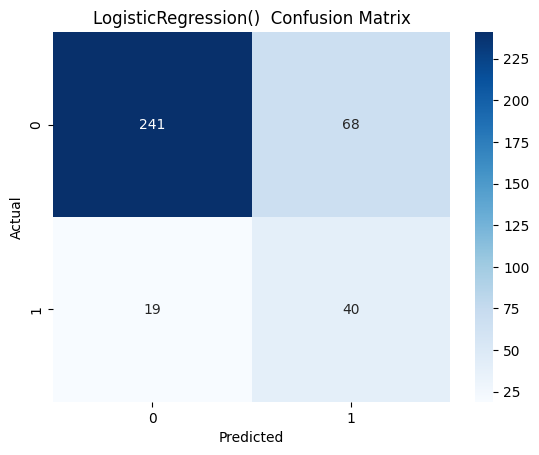

Classification report of LogisticRegression() is:               precision    recall  f1-score   support

           0       0.93      0.78      0.85       309
           1       0.37      0.68      0.48        59

    accuracy                           0.76       368
   macro avg       0.65      0.73      0.66       368
weighted avg       0.84      0.76      0.79       368

****************************************************************************
Accuracy score of SVC() is: 0.954004329004329 and 0.8315217391304348
F1 score of SVC() is: 0.515625
Precision score of SVC() is: 0.4782608695652174
Recall score of SVC() is: 0.559322033898305


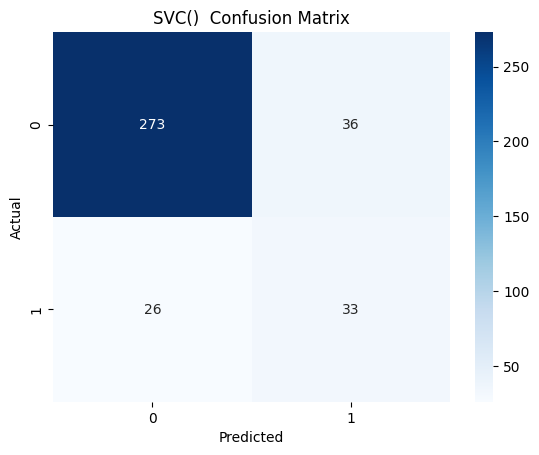

Classification report of SVC() is:               precision    recall  f1-score   support

           0       0.91      0.88      0.90       309
           1       0.48      0.56      0.52        59

    accuracy                           0.83       368
   macro avg       0.70      0.72      0.71       368
weighted avg       0.84      0.83      0.84       368

****************************************************************************
Accuracy score of RandomForestClassifier() is: 1.0 and 0.8559782608695652
F1 score of RandomForestClassifier() is: 0.4044943820224719
Precision score of RandomForestClassifier() is: 0.6
Recall score of RandomForestClassifier() is: 0.3050847457627119


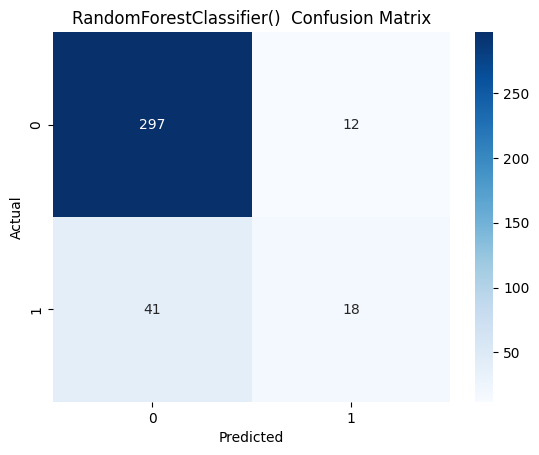

Classification report of RandomForestClassifier() is:               precision    recall  f1-score   support

           0       0.88      0.96      0.92       309
           1       0.60      0.31      0.40        59

    accuracy                           0.86       368
   macro avg       0.74      0.63      0.66       368
weighted avg       0.83      0.86      0.84       368

****************************************************************************
Accuracy score of DecisionTreeClassifier() is: 1.0 and 0.7744565217391305
F1 score of DecisionTreeClassifier() is: 0.366412213740458
Precision score of DecisionTreeClassifier() is: 0.3333333333333333
Recall score of DecisionTreeClassifier() is: 0.4067796610169492


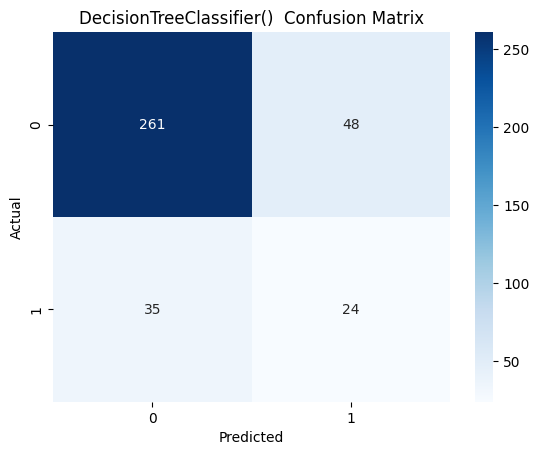

Classification report of DecisionTreeClassifier() is:               precision    recall  f1-score   support

           0       0.88      0.84      0.86       309
           1       0.33      0.41      0.37        59

    accuracy                           0.77       368
   macro avg       0.61      0.63      0.61       368
weighted avg       0.79      0.77      0.78       368

****************************************************************************
Accuracy score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_d

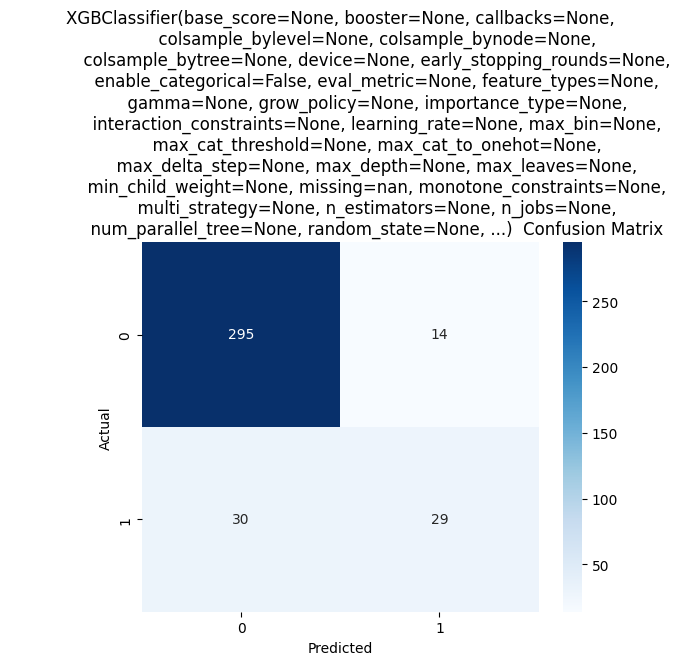

Classification report of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) is:               precision    recall  f1-score   support

           0       0.91      0.95      0.93       309
           1       0.67      0.49      0.57        59

    accuracy                           0.88      

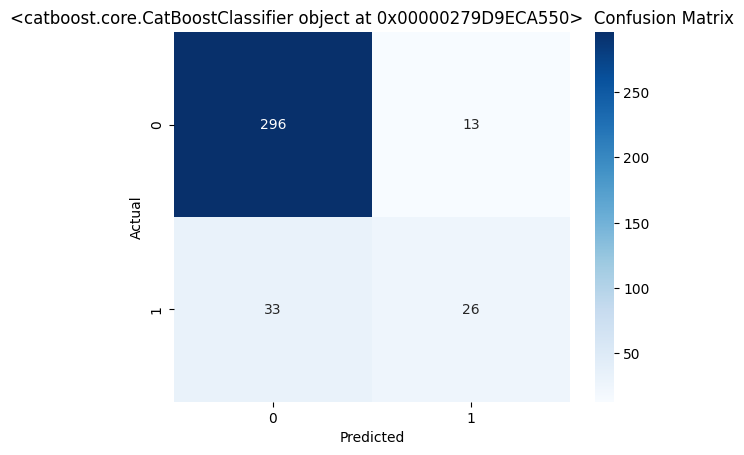

Classification report of <catboost.core.CatBoostClassifier object at 0x00000279D9ECA550> is:               precision    recall  f1-score   support

           0       0.90      0.96      0.93       309
           1       0.67      0.44      0.53        59

    accuracy                           0.88       368
   macro avg       0.78      0.70      0.73       368
weighted avg       0.86      0.88      0.86       368

****************************************************************************
Accuracy score of KNeighborsClassifier() is: 0.8804112554112554 and 0.6630434782608695
F1 score of KNeighborsClassifier() is: 0.38613861386138615
Precision score of KNeighborsClassifier() is: 0.2727272727272727
Recall score of KNeighborsClassifier() is: 0.6610169491525424


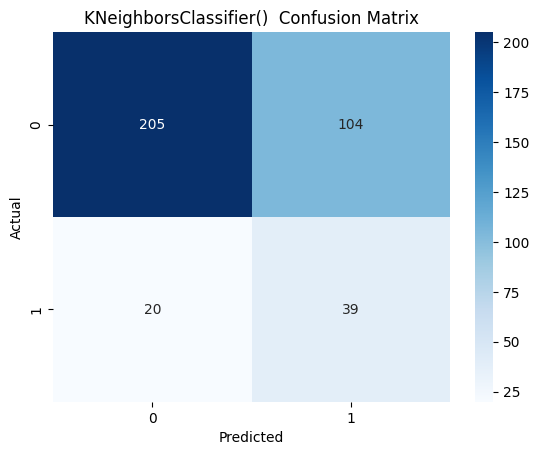

Classification report of KNeighborsClassifier() is:               precision    recall  f1-score   support

           0       0.91      0.66      0.77       309
           1       0.27      0.66      0.39        59

    accuracy                           0.66       368
   macro avg       0.59      0.66      0.58       368
weighted avg       0.81      0.66      0.71       368

****************************************************************************
Accuracy score of GaussianNB() is: 0.7083333333333334 and 0.5597826086956522
F1 score of GaussianNB() is: 0.31932773109243695
Precision score of GaussianNB() is: 0.2122905027932961
Recall score of GaussianNB() is: 0.6440677966101694


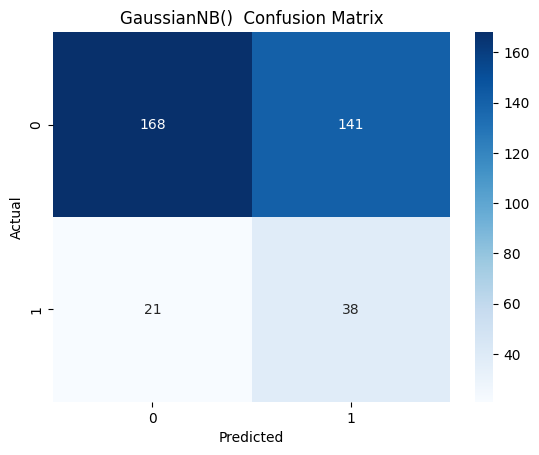

Classification report of GaussianNB() is:               precision    recall  f1-score   support

           0       0.89      0.54      0.67       309
           1       0.21      0.64      0.32        59

    accuracy                           0.56       368
   macro avg       0.55      0.59      0.50       368
weighted avg       0.78      0.56      0.62       368

****************************************************************************
Accuracy score of GradientBoostingClassifier() is: 0.9788961038961039 and 0.8614130434782609
F1 score of GradientBoostingClassifier() is: 0.49504950495049505
Precision score of GradientBoostingClassifier() is: 0.5952380952380952
Recall score of GradientBoostingClassifier() is: 0.423728813559322


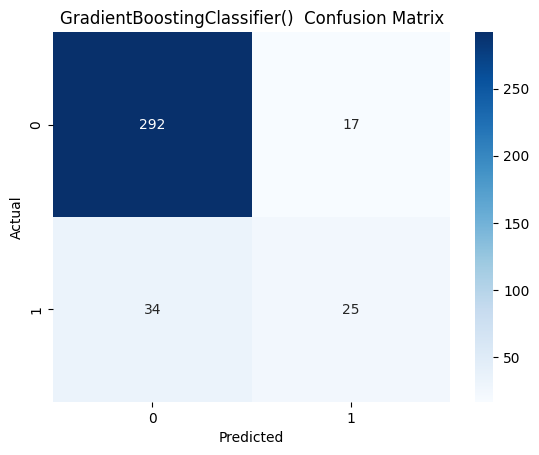

Classification report of GradientBoostingClassifier() is:               precision    recall  f1-score   support

           0       0.90      0.94      0.92       309
           1       0.60      0.42      0.50        59

    accuracy                           0.86       368
   macro avg       0.75      0.68      0.71       368
weighted avg       0.85      0.86      0.85       368

****************************************************************************


c:\CODDING\data_science\Predicting_Employee_Attrition\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy score of AdaBoostClassifier() is: 0.9296536796536796 and 0.8505434782608695
F1 score of AdaBoostClassifier() is: 0.5528455284552846
Precision score of AdaBoostClassifier() is: 0.53125
Recall score of AdaBoostClassifier() is: 0.576271186440678


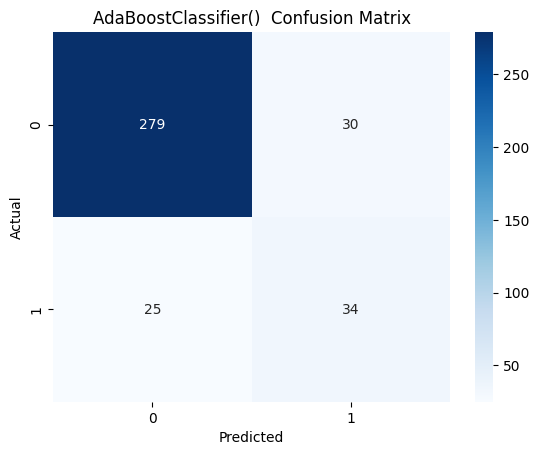

Classification report of AdaBoostClassifier() is:               precision    recall  f1-score   support

           0       0.92      0.90      0.91       309
           1       0.53      0.58      0.55        59

    accuracy                           0.85       368
   macro avg       0.72      0.74      0.73       368
weighted avg       0.86      0.85      0.85       368

****************************************************************************


In [65]:
models=[LogisticRegression(),SVC(),RandomForestClassifier(),DecisionTreeClassifier(),XGBClassifier(),CatBoostClassifier(verbose=0),KNeighborsClassifier(),GaussianNB(),GradientBoostingClassifier(),AdaBoostClassifier()]
train_acc=[]
test_acc=[]
recall_scores=[]



# Loop through the models
for model in models:
    model.fit(X_train_smote, y_train_smote)
    # prediction with x_test
    y_pred=model.predict(X_test)
    #prediction with x_train
    y_train_predict=model.predict(X_train_smote)

    train_accuracy=accuracy_score(y_train_smote,y_train_predict)
    train_acc.append(train_accuracy)
    test_accuracy=accuracy_score(y_test,y_pred)
    test_acc.append(test_accuracy)
    recall=recall_score(y_test,y_pred)
    recall_scores.append(recall)
    
    print(f"Accuracy score of {model} is: {train_accuracy} and {test_accuracy}")
    print(f"F1 score of {model} is: {f1_score(y_test,y_pred)}")
    print(f"Precision score of {model} is: {precision_score(y_test,y_pred)}")
    print(f"Recall score of {model} is: {recall_score(y_test,y_pred)}")
    cb_cnf = confusion_matrix(y_test, y_pred)
    sns.heatmap(cb_cnf, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model}  Confusion Matrix')
    plt.show()
    print(f"Classification report of {model} is: {classification_report(y_test,y_pred)}")
    print("*"*76)

# Nural Network

In [66]:
class SimpleNNBinary(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNNBinary, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input layer to hidden layer
        self.relu = nn.ReLU()  # Activation function
        self.fc2 = nn.Linear(hidden_size, output_size)  # Hidden layer to output layer
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation for binary classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [67]:
model = SimpleNNBinary(input_size=X_train_t.shape[1], hidden_size=32, output_size=1)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_t)
    # Compute loss
    loss = criterion(outputs, y_train_t)
    # Zero gradients, backward pass, and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Print progress
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.2281
Epoch [200/1000], Loss: 0.0888
Epoch [300/1000], Loss: 0.0400
Epoch [400/1000], Loss: 0.0185
Epoch [500/1000], Loss: 0.0098
Epoch [600/1000], Loss: 0.0060
Epoch [700/1000], Loss: 0.0040
Epoch [800/1000], Loss: 0.0028
Epoch [900/1000], Loss: 0.0021
Epoch [1000/1000], Loss: 0.0016


Accuracy on training set: 100.00%
Accuracy on test set: 80.71%
Recall on test set: 47.46%
F1 score  is: 0.4409448818897638
Precision score is: 0.4117647058823529


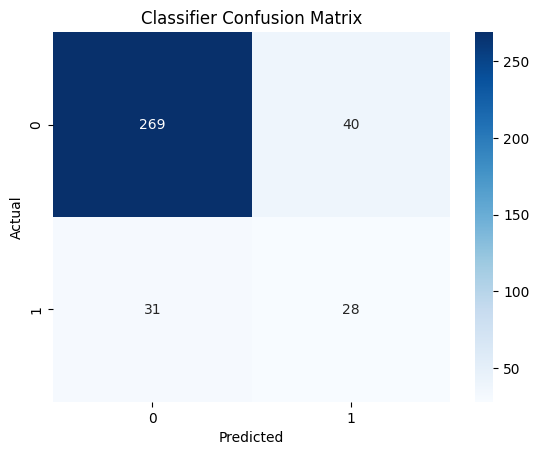

Classification report of is:               precision    recall  f1-score   support

           0       0.90      0.87      0.88       309
           1       0.41      0.47      0.44        59

    accuracy                           0.81       368
   macro avg       0.65      0.67      0.66       368
weighted avg       0.82      0.81      0.81       368



In [68]:
with torch.no_grad():
    model.eval()  # Set model to evaluation mode
    test_outputs = model(X_test_t)
    train_outputs = model(X_train_t)
    # Convert probabilities to binary predictions
    predictions_train=(train_outputs>=0.5).float()
    predictions = (test_outputs >= 0.5).float()
    accuracy_train = accuracy_score(y_train_t, predictions_train)
    train_acc.append(accuracy_train)
    accuracy_test = accuracy_score(y_test_t, predictions)
    test_acc.append(accuracy_test)
    recall = recall_score(y_test_t, predictions)
    recall_scores.append(recall)
    print(f'Accuracy on training set: {accuracy_train*100:.2f}%')
    print(f'Accuracy on test set: {accuracy_test*100:.2f}%')
    print(f'Recall on test set: {recall*100:.2f}%')
    print(f"F1 score  is: {f1_score(y_test,predictions)}")
    print(f"Precision score is: {precision_score(y_test,predictions)}")
    cb_cnf = confusion_matrix(y_test, predictions)
    sns.heatmap(cb_cnf, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Classifier Confusion Matrix')
    plt.show()
    print(f"Classification report of is: {classification_report(y_test,predictions)}")


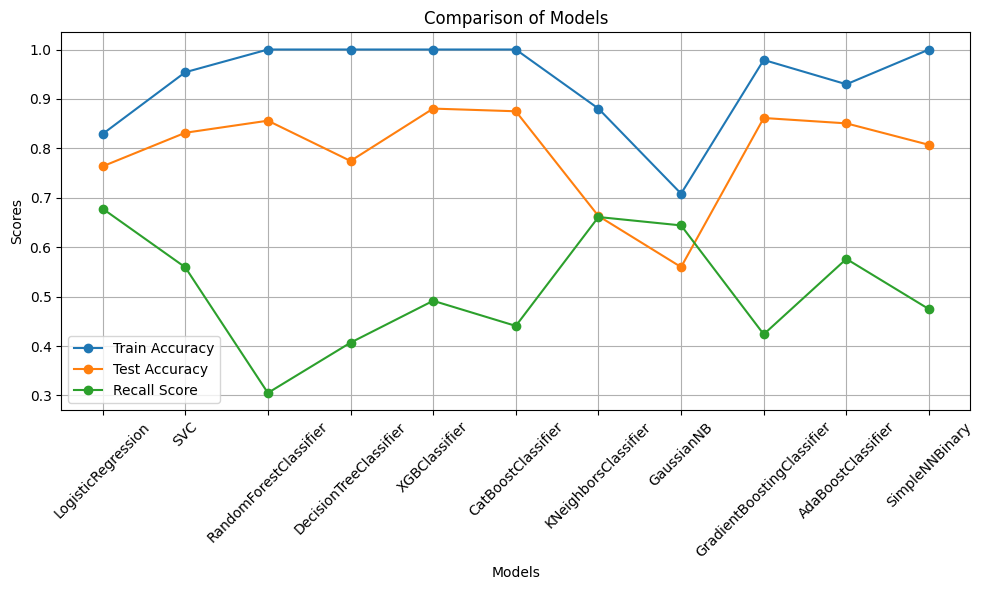

In [69]:
mods=['LogisticRegression','SVC','RandomForestClassifier','DecisionTreeClassifier','XGBClassifier','CatBoostClassifier','KNeighborsClassifier','GaussianNB','GradientBoostingClassifier','AdaBoostClassifier','SimpleNNBinary']


plt.figure(figsize=(10, 6))

# Train accuracy
plt.plot(mods, train_acc, marker='o', label='Train Accuracy')

# Test accuracy
plt.plot(mods, test_acc, marker='o', label='Test Accuracy')

# Recall score
plt.plot(mods, recall_scores, marker='o', label='Recall Score')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Models')
plt.legend()

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [147]:
from sklearn.model_selection import GridSearchCV
grid_search_params = {
    'penalty': ['l1', 'l2'],                    # Regularization penalty (l1: Lasso, l2: Ridge)
    'C': [0.001, 0.01, 0.1, 1, 10, 100],        # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],            # Algorithm to use in optimization problem
    'max_iter': [100, 200, 300],                 # Maximum number of iterations for optimization
    'class_weight': [None, 'balanced'],          # Weights associated with classes to address class imbalance
    'tol': [1e-4, 1e-3, 1e-2],                   # Tolerance for stopping criteria
    'fit_intercept': [True, False]               # Whether to fit the intercept for the model
}

In [149]:
lo_clf = LogisticRegression(random_state=3)
lo_cv = GridSearchCV(lo_clf, grid_search_params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lo_cv.fit(X_train_smote, y_train_smote)
best_params = lo_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best paramters: {'C': 1, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001})


In [151]:
lo_cv.best_score_

0.8

Accuracy score of LogisticRegression(C=1, penalty='l1', solver='liblinear') is: 0.8056122448979591 and 0.7959183673469388
F1 score of LogisticRegression(C=1, penalty='l1', solver='liblinear') is: 0.4827586206896552
Precision score of LogisticRegression(C=1, penalty='l1', solver='liblinear') is: 0.37333333333333335
Recall score of LogisticRegression(C=1, penalty='l1', solver='liblinear') is: 0.6829268292682927


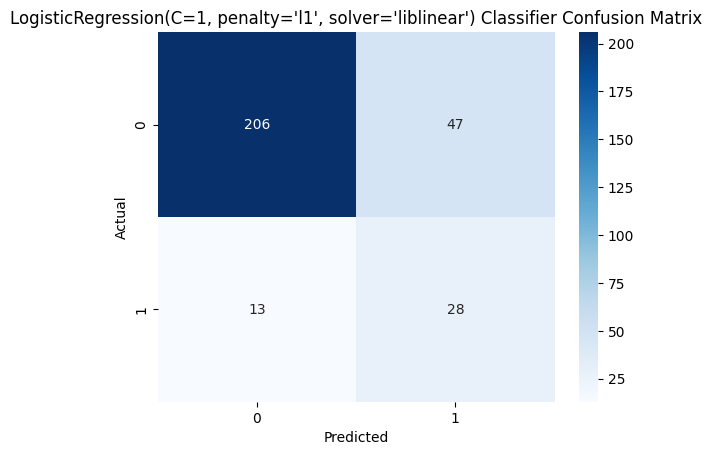

Classification report of LogisticRegression(C=1, penalty='l1', solver='liblinear') is:               precision    recall  f1-score   support

           0       0.94      0.81      0.87       253
           1       0.37      0.68      0.48        41

    accuracy                           0.80       294
   macro avg       0.66      0.75      0.68       294
weighted avg       0.86      0.80      0.82       294

****************************************************************************


In [152]:
model=LogisticRegression(**best_params)
model.fit(X_train_smote, y_train_smote)#training the model
y_pred=model.predict(X_test)

#prediction with x_train
y_train_predict=model.predict(X_train_smote)
train_accuracy=accuracy_score(y_train_smote,y_train_predict)
test_accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print(f"Accuracy score of {model} is: {train_accuracy} and {test_accuracy}")
print(f"F1 score of {model} is: {f1_score(y_test,y_pred)}")
print(f"Precision score of {model} is: {precision_score(y_test,y_pred)}")
print(f"Recall score of {model} is: {recall_score(y_test,y_pred)}")
cb_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(cb_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'{model} Classifier Confusion Matrix')
plt.show()
print(f"Classification report of {model} is: {classification_report(y_test,y_pred)}")
print("*"*76)